In [16]:
from sklearn.datasets import load_diabetes

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [19]:
X,y = load_diabetes(return_X_y=True)

In [4]:
X.shape

(442, 10)

In [47]:
y.shape

(442,)

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
X_train.shape

(353, 10)

In [22]:
# without standard scaling
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred_test = lr.predict(X_test)
y_pred_train = lr.predict(X_train)
print('Test dataset', r2_score(y_test, y_pred_test))
print('Train dataset', r2_score(y_train, y_pred_train))

Test dataset 0.4399338661568968
Train dataset 0.5323672232993288


In [23]:
print('Actual of y_train', y_train[0])
print('Actual of y_test', y_test[0])
print('Predicted of y_train', y_pred_train[0])
print('Predicted of y_test', y_pred_test[0])

Actual of y_train 48.0
Actual of y_test 73.0
Predicted of y_train 69.58894843334197
Predicted of y_test 154.12138809538374


In [24]:
y_pred_test[0]

np.float64(154.12138809538374)

In [25]:
lr.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [26]:
lr.intercept_

np.float64(151.88331005254167)

In [28]:
# Using standard scaling
scaler = StandardScaler()
X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

lr.fit(X_train_trf, y_train)

y_pred_test_trf = lr.predict(X_test_trf)
y_pred_train_trf = lr.predict(X_train_trf)

print('Test score after scaled', r2_score(y_test, y_pred_test_trf))
print('Train score after scaled', r2_score(y_train, y_pred_train_trf))

Test score after scaled 0.4399338661568968
Train score after scaled 0.5323672232993288


Insights: The r2_score is same before and after standard scaling

# SGD Regressor from Scratch

In [29]:
class SGDRegressor:
    def __init__(self,learning_rate=0.01,epochs=100):
        self.lr = learning_rate
        self.epochs = epochs
        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train,y_train):
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            for j in range(X_train.shape[0]):
                idX = np.random.randint(0,X_train.shape[0])

                y_hat = np.dot(X_train[idX], self.coef_) + self.intercept_

                intercept_der = -2 * (y_train[idX] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idX] - y_hat), X_train[idX])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        print('Coefficient (m):', self.coef_)
        print('Intercept (b):', self.intercept_)
    def predict(self,X_test):
        return np.dot(X_test, self.coef_) + self.intercept_

In [30]:
sgdr = SGDRegressor()

In [31]:
sgdr.fit(X_train,y_train)


Coefficient (m): [  40.23177699 -145.79089378  448.83856941  310.04093534  -19.89746163
  -85.20652444 -195.80584958  122.24614295  407.30554767  113.45170507]
Intercept (b): 145.3041404424661


In [32]:
sgdr.predict(X_test)[0]

np.float64(146.78912325444603)

In [10]:
from sklearn.datasets import fetch_california_housing
import pandas as pd


In [11]:
housing = fetch_california_housing(as_frame=True)
df = housing.frame

In [27]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [35]:
correlation_matr = df.corr()

In [36]:
import seaborn as sns

<Axes: >

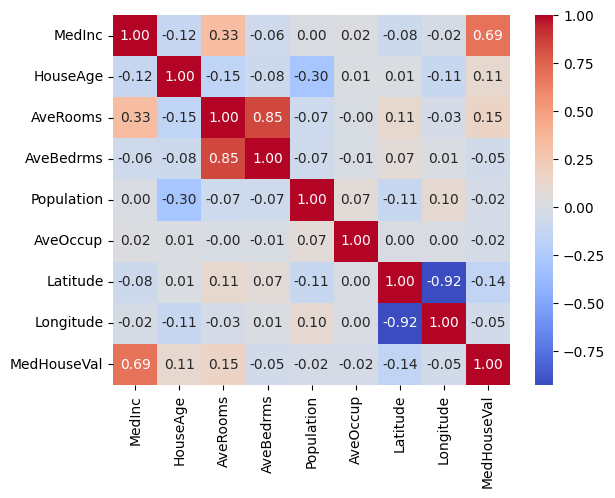

In [16]:
sns.heatmap(correlation_matr, annot=True, cmap='coolwarm', fmt='.2f')

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

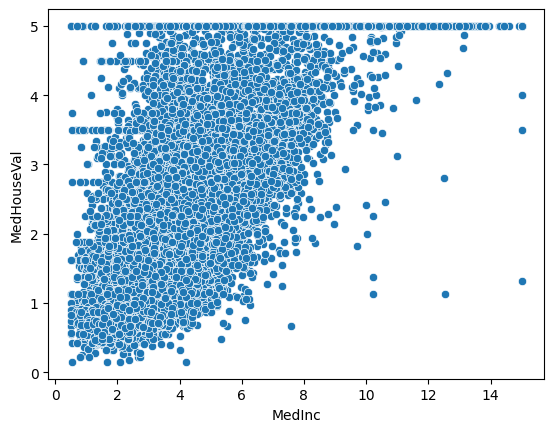

In [37]:
sns.scatterplot(data=df, x='MedInc',y='MedHouseVal')

In [38]:
import plotly.express as px

fig = px.scatter_3d(df, x='MedInc', y='AveRooms', z='MedHouseVal')
fig.show()


In [39]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [40]:
import matplotlib.pyplot as plt

In [41]:
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude']


target = ['MedHouseVal']


In [12]:
for i, col in features:
    plt.subplot(col,2,col)
    plt.scatter(x=df[col], y=df['MedHouseVal'])
    plt.title(f'Correlation between {col} and {target}')

plt.show()

NameError: name 'features' is not defined

In [45]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=features, ncols=target, figsize=(5*features,5))

for i, col in enumerate(features.columns):
    axes[i].scatter(x=features[col], y=target)

plt.tight_layout()
plt.show()


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [ ]:
fo

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >], dtype=object)

In [16]:
from sklearn.preprocessing import StandardScaler

In [47]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [13]:
X = df.iloc[:,:8]
y= df.iloc[:,-1]

In [14]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

scaler = StandardScaler()

X_train_trans = scaler.fit_transform(X_train)
X_test_trans = scaler.transform(X_test)

reg = LinearRegression()

reg.fit(X_train_trans, y_train)

y_pred = reg.predict(X_test_trans)

r2_score(y_test, y_pred)

0.6013853272055153

In [18]:
import matplotlib.pyplot as plt

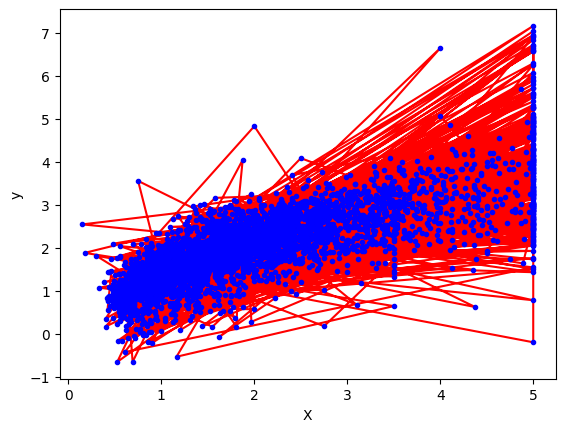

In [20]:
plt.plot(y_test, y_pred, color='r')
plt.plot(y_test,y_pred,'b.')
plt.xlabel('X')
plt.ylabel('y')
plt.show()